# [Bài tập] Phân tích bộ dữ liệu Online Retail

In [52]:
# import thư viện
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [7]:
# đọc dữ liệu
df = pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# in ra kich thuoc du lieu
df.shape

(541909, 8)

In [4]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Cột Description va CustomerID có giá trị null

In [4]:
# Mô tả dữ liệu
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Sử dụng isNa để tìm dữ liệu khuyết thiếu
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
# kiểm tra dữ liệu không bị khuyết
df['CustomerID'].notna()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [47]:
# Tìm xem có bao nhiêu dòng có giá trị khuyết thiếu
df1 = df.dropna()

df.shape[0]-df1.shape[0]

135080

In [48]:
# Tìm cột có giá trị khuyết thiếu
df2 = df.dropna(axis='columns')
df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


Sử dụng kiến thức bản thân để xác định dữ liệu khuyết thiếu có gây ảnh hưởng
- Có 2 cột bị xoá ở trên nghĩa là cột Description và Customer ID có chứa na
- 135080 dòng có giá trị khuyết thiếu --> số lượng không nhỏ
- không nên xoá các dòng có giá trị khuyết thiếu vì không phản ánh chính xác doanh thu. Có invoice nghĩa là có sản phẩm đc bán ra. Tuy nhiên invoice thiếu mất nhận dạng sản phẩm và ID khách hàng

In [8]:
# thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết"
df['Description'].fillna('Không biết')

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908           BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 541909, dtype: object

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

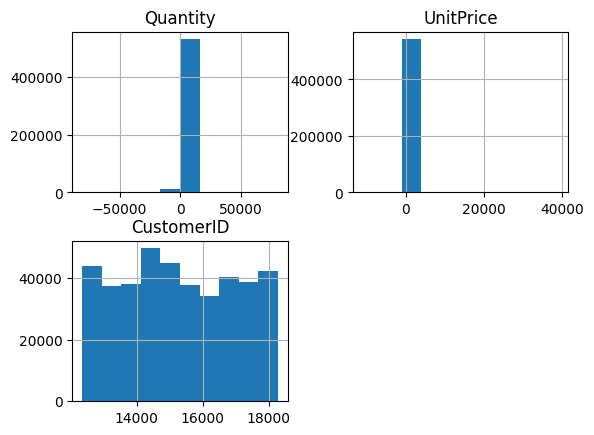

In [9]:
# dùng histogram xem phân bổ dữ liệu
df.hist()

In [10]:
# Giá trị ngoại lai của thuộc tính Quantity chứa giá trị <0, giá trị ngoại lai của UnitPrice <=0
# DataFrame chứa giá trị ngoại lai

outlier_df = df[(df['UnitPrice'] <= 0) | (df['Quantity'] <0)]

In [8]:
# DataFrame chứa giá trị bình thường
normal_df = df[(df['UnitPrice'] > 0) & (df['Quantity'] >=0)]

In [10]:
# Mô tả dữ liệu ban đầu
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Mô tả và nhận xet dữ liệu ban đầu

- Trung bình giá một sản phẩm là 4.61
- độ lêch chuẩn của giá là 96.75 -> mức chênh lệch giá của các sản phẩm so với giá trung bình rất cao
- giá unit price nhỏ nhất là -11062 -> giá trị sai vì không thể có giá trị âm và rất xa trung bình
- giá unit price lớn nhất là 38970 - giá trị lớn và cách xa giá trung bình nhiều -> outlier
- 25% 1.25 -> 25% sp có giá mỗi sp dưới 1.25 -> nhỏ hơn nhưng khá gần với trung bình
- 50% 2.08 -> 50% sp có giá mỗi sp dưới 2.08 -> nhỏ hơn nhưng khá gần với trung bình
- 75% 4.13 -> 75% sp có giá mỗi sp dưới 4.13 -> nhỏ hơn trung bình -> phần lớn dữ liệu thiên về giá thấp nhưng có nhiều dữ liệu ngoại lai có giá trị cao hẳn 


In [11]:
# Mô tả dữ liệu sau khi lọc outlier
normal_df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Mô tả thông tin của bộ dữ liệu và nhận xét. 
Dữ liệu mô tả tình hình kinh doanh của một doanh nghiệp bán hàng online

- Trung bình giá một sản phẩm là 3.90
- độ lêch chuẩn của giá là 35.91 -> mức chênh lệch giá của các sản phẩm so với giá trung bình hơi lớn nhưng đã giảm đi khá nhiều so với dữ liệu ban đầu có độ lệch chuẩn là 95.76
- giá unit price nhỏ nhất là 0.001 -> giá trị gần với trung bình
- giá unit price lớn nhất là 13541 - giá trị lớn và cách xa giá trung bình nhiều -> khả năng là outlier
- 25% 1.25 -> 25% sp có giá mỗi sp dưới 1.25 -> nhỏ hơn nhưng khá gần với trung bình
- 50% 2.08 -> 50% sp có giá mỗi sp dưới 2.08 -> nhỏ hơn nhưng khá gần với trung bình
- 75% 4.13 -> 75% sp có giá mỗi sp dưới 4.13 -> lớn hơn trung bình -> phần lớn dữ liệu thiên về giá thấp nhưng phân bố đã gần chuẩn hơn so với dữ liệu ban đầu

Nhận xét: sau khi xử lý outlier, phân bố dữ liệu đã đều hơn và ít đi các giá trị sai (ví dụ như giá trị âm). Vẫn còn các giá trị có thể là outlier như giá trị max đang khá xa so với trung bình

Đề xuất: 
- tìm và xử lý ngoại lai theo IQR hoặc std


Bài thực hành mẫu trên learn

In [27]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [11]:
# xóa những dòng chứa toàn giá trị khuyết
df2 = df.dropna(how='all')

In [12]:
df2.shape

(541909, 8)

In [15]:
# giữ những dòng có ít nhất 7 giá trị không bị khuyết
df3 = df2.dropna(thresh = 7)

In [16]:
df3.shape

(540455, 8)

In [17]:
# xóa những hàng mà có giá trị bị khuyết trên cột CustomerID
df4 = df.dropna(subset='CustomerID')

In [18]:
df4.shape

(406829, 8)

In [20]:
# thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df5 = df
df5['CustomerID'] = df['CustomerID'].fillna(-1)

In [21]:
# hiển thị những dòng có CustomerID = -1 vừa được thay thế
df5[df5['CustomerID'] == -1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,-1.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,-1.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,-1.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,-1.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,-1.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,-1.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,-1.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,-1.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,-1.0,United Kingdom


In [23]:
# thay thế các giá trị bị khuyết ở cột Country bằng giá trị trước nó
df5['Country'] = df['Country'].fillna(method ='ffill')

/var/folders/7b/s694fx0d6wb04bgqp_b182140000gn/T/ipykernel_92509/2824429047.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df5['Country'] = df['Country'].fillna(method ='ffill')


In [24]:
df5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<Axes: xlabel='Quantity'>

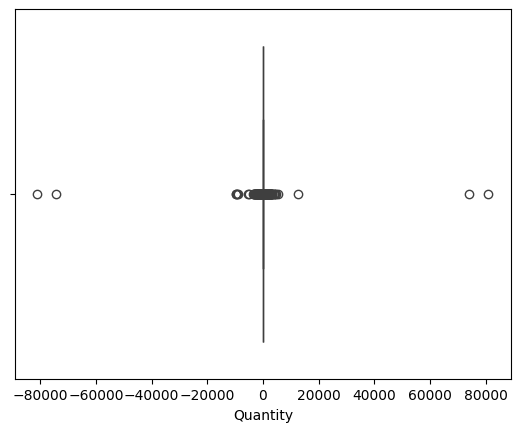

In [25]:
# vẽ box plot cho dữ liệu ở cột Quantity
sns.boxplot(x=df['Quantity'])

In [28]:
Q1 = df1['Quantity'].quantile(0.25)
Q3 = df1['Quantity'].quantile(0.75)
IQR = Q3 - Q1

In [29]:
# xác định phần tử không phải ngoại lai
df6 = df1
df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))

/var/folders/7b/s694fx0d6wb04bgqp_b182140000gn/T/ipykernel_92509/1239747105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))


In [30]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

<Axes: xlabel='Quantity'>

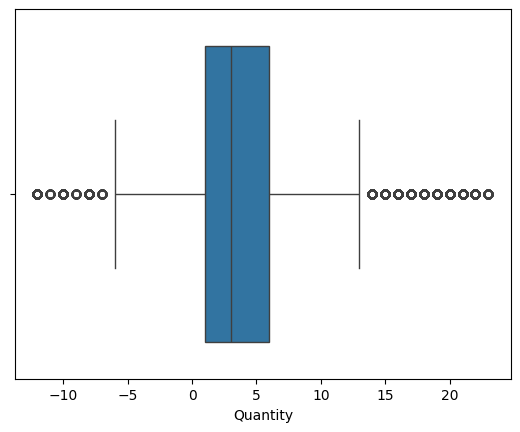

In [31]:
sns.boxplot(x=df6['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

<Axes: xlabel='Quantity'>

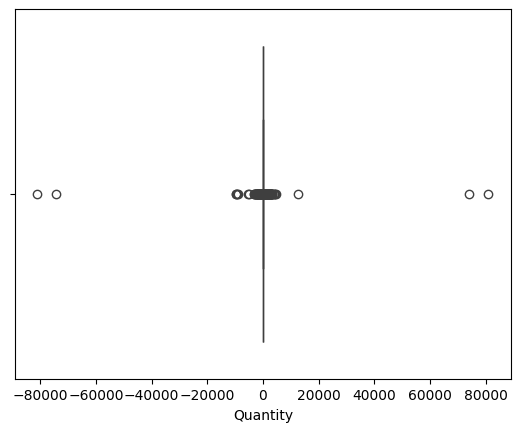

In [53]:
# vẽ biểu đồ hộp cho cột Quantity
sns.boxplot(x=df1['Quantity'])

Chuẩn hóa dữ liệu

In [33]:
# mô tả dữ liệu
df1['Quantity'].describe()

count    540455.000000
mean          9.603129
std         218.007598
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [40]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với MinMaxScaler ở 2 cột Quantity và UnitPrice
df_m = scaler.fit_transform(df1[['Quantity']])

In [41]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_m).describe()

,0
count,540455.000000
mean,0.500059
std,0.001346
min,0.000000
25%,0.500006
50%,0.500019
75%,0.500062
max,1.000000


<Axes: >

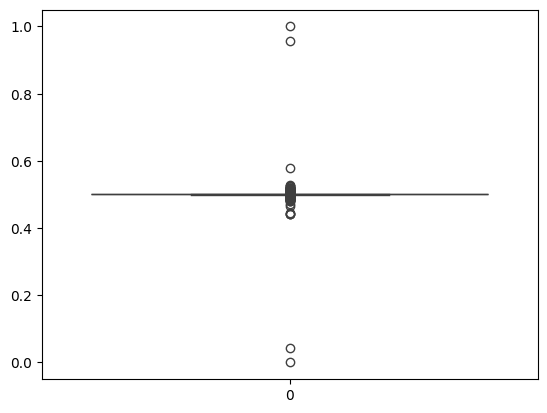

In [55]:
# vẽ lại biểu đồ hộp
sns.boxplot(df_m)

In [38]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với RobustScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [39]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,540455.000000
mean,0.733681
std,24.223066
min,-8999.777778
25%,-0.222222
50%,0.000000
75%,0.777778
max,8999.111111


<Axes: >

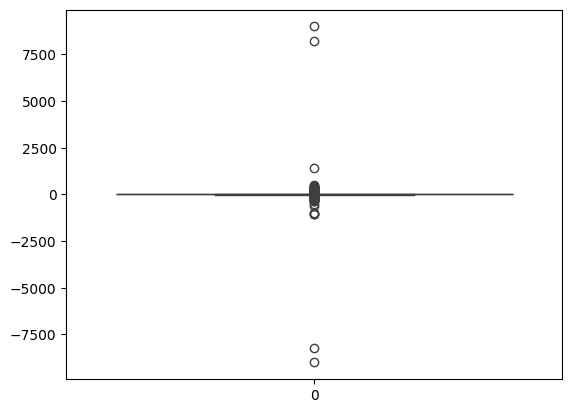

In [44]:
# vẽ lại biểu đồ hộp
sns.boxplot(df_s)

In [45]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Quantity và UnitPrice
df_z = scaler.fit_transform(df1[['Quantity']])

In [46]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_z).describe()

,0
count,5.404550e+05
mean,3.497134e-18
std,1.000001e+00
min,-3.715681e+02
25%,-3.946255e-02
50%,-3.028855e-02
75%,1.820448e-03
max,3.714800e+02


<Axes: >

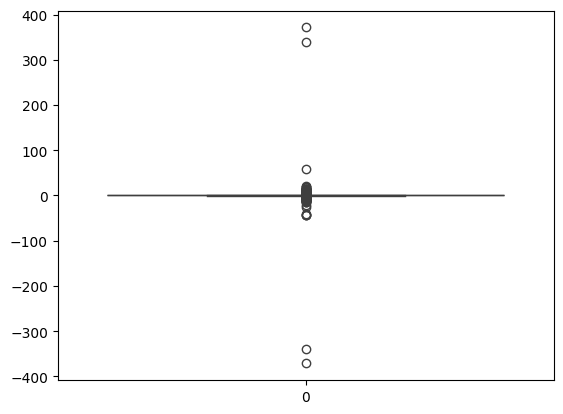

In [48]:
sns.boxplot(df_z)

Mã hóa dữ liệu

In [49]:
# các giá trị ở cột Country
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [56]:
# mã hóa cột Country với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# mã hóa cột Country với One-hot encoder sử dụng pandas
pd.get_dummies(df1['Country'])

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# mã hóa cột Country với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']))
encoded_data

array([36, 36, 36, ..., 13, 13, 13])

In [59]:
# mã hóa cột Country với Label encoder sử dụng pandas
df1['Country'].astype('category').cat.codes

0         36
1         36
2         36
3         36
4         36
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Length: 540455, dtype: int8

Rời rạc hóa dữ liệu

In [60]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True


In [61]:
# Rời rạc hóa dữ liệu ở cột UnitPrice

# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats =pd.cut(df1['UnitPrice'], 4)

In [62]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

/var/folders/7b/s694fx0d6wb04bgqp_b182140000gn/T/ipykernel_92509/1627403880.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


UnitPrice
(-11112.092, 1445.955]    540368
(1445.955, 13953.97]          83
(13953.97, 26461.985]          3
(26461.985, 38970.0]           1
Name: count, dtype: int64

In [63]:
# chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df1['UnitPrice'], 4)
cats

0               (2.08, 4.13]
1               (2.08, 4.13]
2               (2.08, 4.13]
3               (2.08, 4.13]
4               (2.08, 4.13]
                 ...        
541904    (-11062.061, 1.25]
541905          (2.08, 4.13]
541906       (4.13, 38970.0]
541907       (4.13, 38970.0]
541908       (4.13, 38970.0]
Name: UnitPrice, Length: 540455, dtype: category
Categories (4, interval[float64, right]): [(-11062.061, 1.25] < (1.25, 2.08] < (2.08, 4.13] < (4.13, 38970.0]]

In [64]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

/var/folders/7b/s694fx0d6wb04bgqp_b182140000gn/T/ipykernel_92509/1627403880.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


UnitPrice
(-11062.061, 1.25]    165931
(2.08, 4.13]          140503
(4.13, 38970.0]       128915
(1.25, 2.08]          105106
Name: count, dtype: int64